In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv("/content/drive/MyDrive/susu/Auto_Arak_MegtettKm.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(X)
print("--------")
print(y)

[[  2747]
 [  3890]
 [ 31551]
 [ 41090]
 [ 41606]
 [ 54886]
 [ 64820]
 [ 65725]
 [ 67435]
 [ 84654]
 [ 87498]
 [103355]
 [110268]
 [119879]
 [121958]
 [123855]
 [129981]
 [130523]
 [131932]
 [137337]
 [141699]
 [146867]
 [149503]
 [156730]
 [175203]
 [184779]
 [191335]
 [194027]
 [199041]
 [207892]
 [214176]
 [235796]
 [252709]
 [256840]
 [258795]
 [259178]
 [262913]
 [267455]
 [273538]
 [278167]]
--------
[18416664 18385659 13385357 12795513 11465689  6068148  7825665  8745683
  9397723  9003758  8775995  6169995  3756508  4303591  4396942  5703682
  4104365  5370928  6057489  5273415  5555555  4305889  5008349  2208261
  3813045  3389673  3363715  3220405  2271836  2487550  1989913  1202283
   696769  1061353   723165  1123587  1450110  1035822   987879  1064685]


Az adatkészlet szétbontása trainingsetre és testsetre

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [11]:
print(X_train)
print("-------")
print(X_test)
print("-------")
print(y_train)
print("-------")
print(y_test)

[[278167]
 [214176]
 [258795]
 [129981]
 [262913]
 [ 67435]
 [119879]
 [ 54886]
 [130523]
 [121958]
 [256840]
 [ 65725]
 [252709]
 [  3890]
 [191335]
 [110268]
 [235796]
 [175203]
 [ 64820]
 [156730]
 [146867]
 [137337]
 [ 84654]
 [273538]
 [ 41090]
 [  2747]]
-------
[[149503]
 [141699]
 [184779]
 [ 41606]
 [ 87498]
 [123855]
 [199041]
 [103355]
 [131932]
 [207892]
 [194027]
 [259178]
 [267455]
 [ 31551]]
-------
[ 1064685  1989913   723165  4104365  1450110  9397723  4303591  6068148
  5370928  4396942  1061353  8745683   696769 18385659  3363715  3756508
  1202283  3813045  7825665  2208261  4305889  5273415  9003758   987879
 12795513 18416664]
-------
[ 5008349  5555555  3389673 11465689  8775995  5703682  2271836  6169995
  6057489  2487550  3220405  1123587  1035822 13385357]


Egyszerű regressziós modul betanítása a training set-re

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()


Előrejelzés a model segítségével

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
print(regressor.predict([[20]]))

[12813647.7720311]


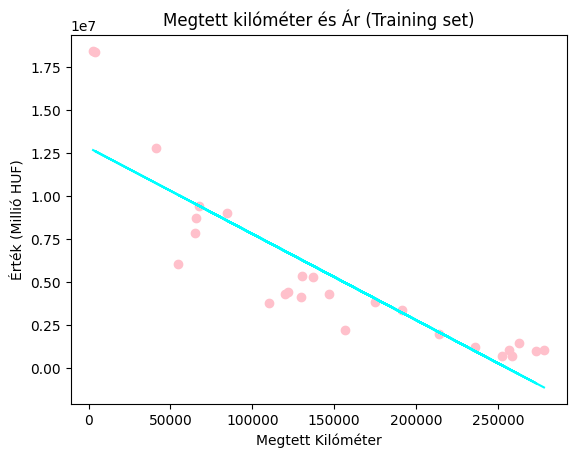

In [17]:
plt.scatter(X_train, y_train, color = 'pink')
plt.plot(X_train, regressor.predict(X_train), color = 'cyan')
plt.title('Megtett kilóméter és Ár (Training set)')
plt.xlabel('Megtett Kilóméter')
plt.ylabel('Érték (Millió HUF)')
plt.show()